# Trend

### ¿Qué es Tendencia?
El componente de tendencia de una serie de tiempo representa un cambio persistente a largo plazo en la media de la serie. La tendencia es la parte de movimiento más lento de una serie, la parte que representa la mayor escala de tiempo de importancia. En una serie temporal de ventas de productos, una tendencia creciente podría ser el efecto de una expansión del mercado a medida que más personas conocen el producto año tras año.

En este curso, nos centraremos en las tendencias en la media. Sin embargo, de manera más general, cualquier cambio persistente y de movimiento lento en una serie podría constituir una tendencia; por ejemplo, las series de tiempo comúnmente tienen tendencias en su variación.

### Gráficos de medias móviles

Para ver qué tipo de tendencia podría tener una serie de tiempo, podemos usar un gráfico de promedio móvil. Para calcular un promedio móvil de una serie de tiempo, calculamos el promedio de los valores dentro de una ventana deslizante de un ancho definido. Cada punto del gráfico representa el promedio de todos los valores de la serie que se encuentran dentro de la ventana de cada lado. La idea es suavizar cualquier fluctuación a corto plazo en la serie para que solo permanezcan los cambios a largo plazo.

Observe cómo la serie Mauna Loa anterior tiene un movimiento ascendente y descendente que se repite año tras año, un cambio estacional a corto plazo. Para que un cambio sea parte de la tendencia, debe ocurrir durante un período más largo que cualquier cambio estacional. Para visualizar una tendencia, por lo tanto, tomamos un promedio durante un período más largo que cualquier período estacional de la serie. Para la serie Mauna Loa, elegimos una ventana de tamaño 12 para suavizar la temporada dentro de cada año.

### Tendencia de ingeniería
Una vez que hayamos identificado la forma de la tendencia, podemos intentar modelarla utilizando una característica de paso de tiempo. Ya hemos visto cómo el uso de la variable ficticia de tiempo modelará una tendencia lineal:

objetivo = a *tiempo + b

Podemos adaptar muchos otros tipos de tendencias a través de transformaciones de la variable ficticia de tiempo. Si la tendencia parece ser cuadrática (una parábola), solo necesitamos agregar el cuadrado del tiempo ficticio al conjunto de características, lo que nos da:

objetivo = a* tiempo ** 2 + b * tiempo + c

La regresión lineal aprenderá los coeficientes a, b y c.

Las curvas de tendencia de la siguiente figura se ajustaron con este tipo de funciones y la regresión lineal de scikit-learn:

Si no ha visto el truco antes, es posible que no se haya dado cuenta de que la regresión lineal puede adaptarse a curvas que no sean líneas. La idea es que si puede proporcionar curvas de la forma adecuada como características, la regresión lineal puede aprender a combinarlas de la forma que mejor se adapte al objetivo.

### Example - Tunnel Traffic¶
In this example we'll create a trend model for the Tunnel Traffic dataset

In [2]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# Load Tunnel Traffic dataset

tunnel = pd.read_csv( "../Kaglee/Data/tunnel.csv", parse_dates=["Day"])
tunnel = tunnel.set_index("Day").to_period()

Hagamos un gráfico de promedio móvil para ver qué tipo de tendencia tiene esta serie. Dado que esta serie tiene observaciones diarias, elijamos una ventana de 365 días para suavizar cualquier cambio a corto plazo dentro del año.

Para crear un promedio móvil, primero use el método rolling  para comenzar un cálculo en ventana. Siga esto por el método de la media para calcular el promedio sobre la ventana. Como podemos ver, la tendencia de Tunnel Traffic parece ser lineal.

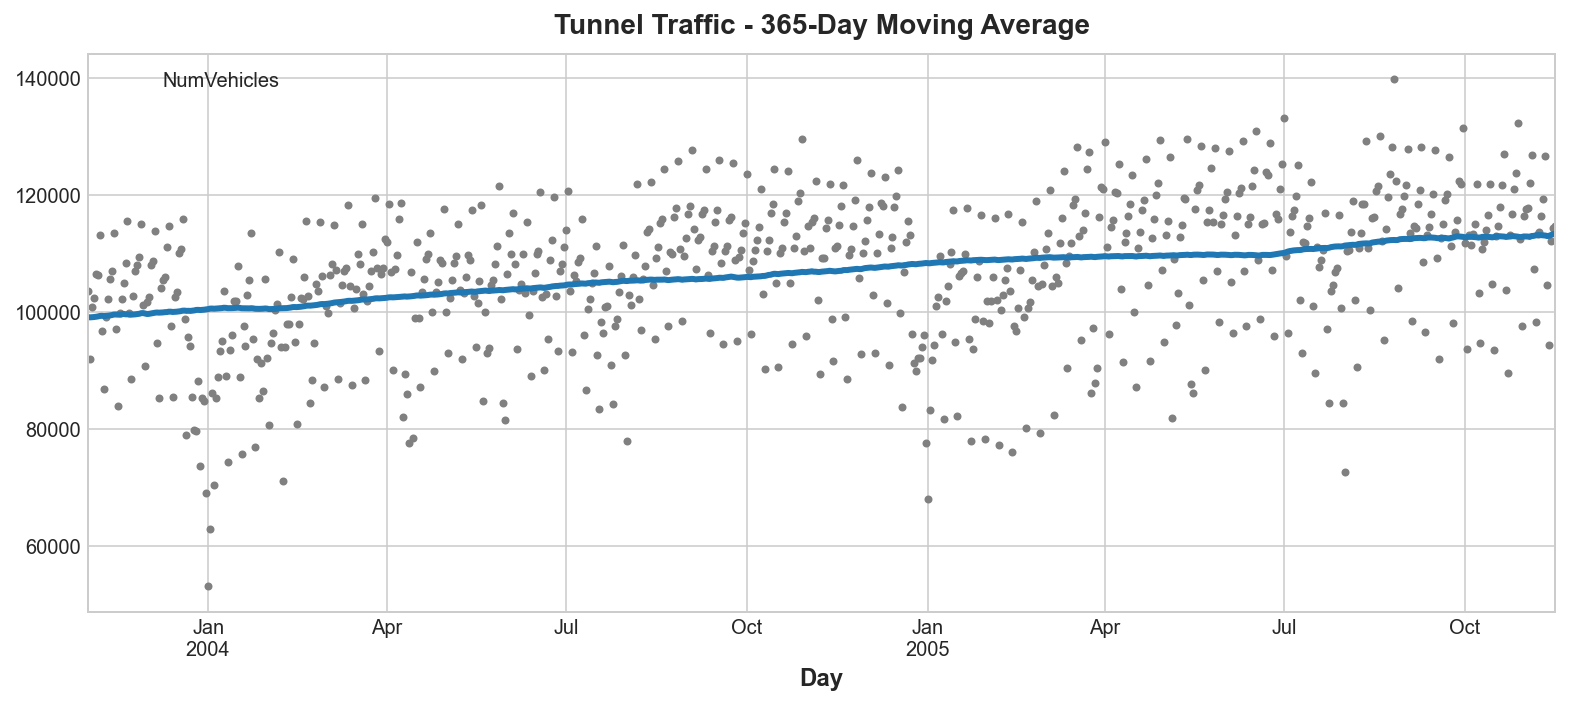

In [3]:
moving_average = tunnel.rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = tunnel.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Tunnel Traffic - 365-Day Moving Average", legend=False,
);

En la Lección 1, diseñamos nuestro muñeco de tiempo directamente :En la Lección 1, diseñamos nuestro muñeco de tiempo directamente en Pandas. De ahora en adelante, sin embargo, usaremos una función de la biblioteca statsmodels llamada DeterministicProcess.

El uso de esta función nos ayudará a evitar algunos casos de falla complicados que pueden surgir con series de tiempo y regresión lineal. El argumento order se refiere al orden polinomial: 1 para lineal, 2 para cuadrático, 3 para cúbico, etc.

In [20]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=tunnel.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()

X.tail(30)

,const,trend
Day,,
2005-10-18,1.0,718.0
2005-10-19,1.0,719.0
2005-10-20,1.0,720.0
2005-10-21,1.0,721.0
2005-10-22,1.0,722.0
2005-10-23,1.0,723.0
2005-10-24,1.0,724.0
2005-10-25,1.0,725.0
2005-10-26,1.0,726.0


(Un proceso determinista, por cierto, es un término técnico para una serie de tiempo que no es aleatoria o está completamente determinada, como lo son las series constantes y de tendencia. Las características derivadas del índice de tiempo generalmente serán deterministas).

Creamos nuestro modelo de tendencia básicamente como antes, aunque tenga en cuenta la adición del argumento fit_intercept=False.

In [10]:
X.shape

(747, 2)

In [14]:
from sklearn.linear_model import LinearRegression

y = tunnel["NumVehicles"]  # the target

# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

La tendencia descubierta por nuestro modelo de regresión lineal es casi idéntica a la gráfica de promedio móvil, lo que sugiere que una tendencia lineal fue la decisión correcta en este caso.

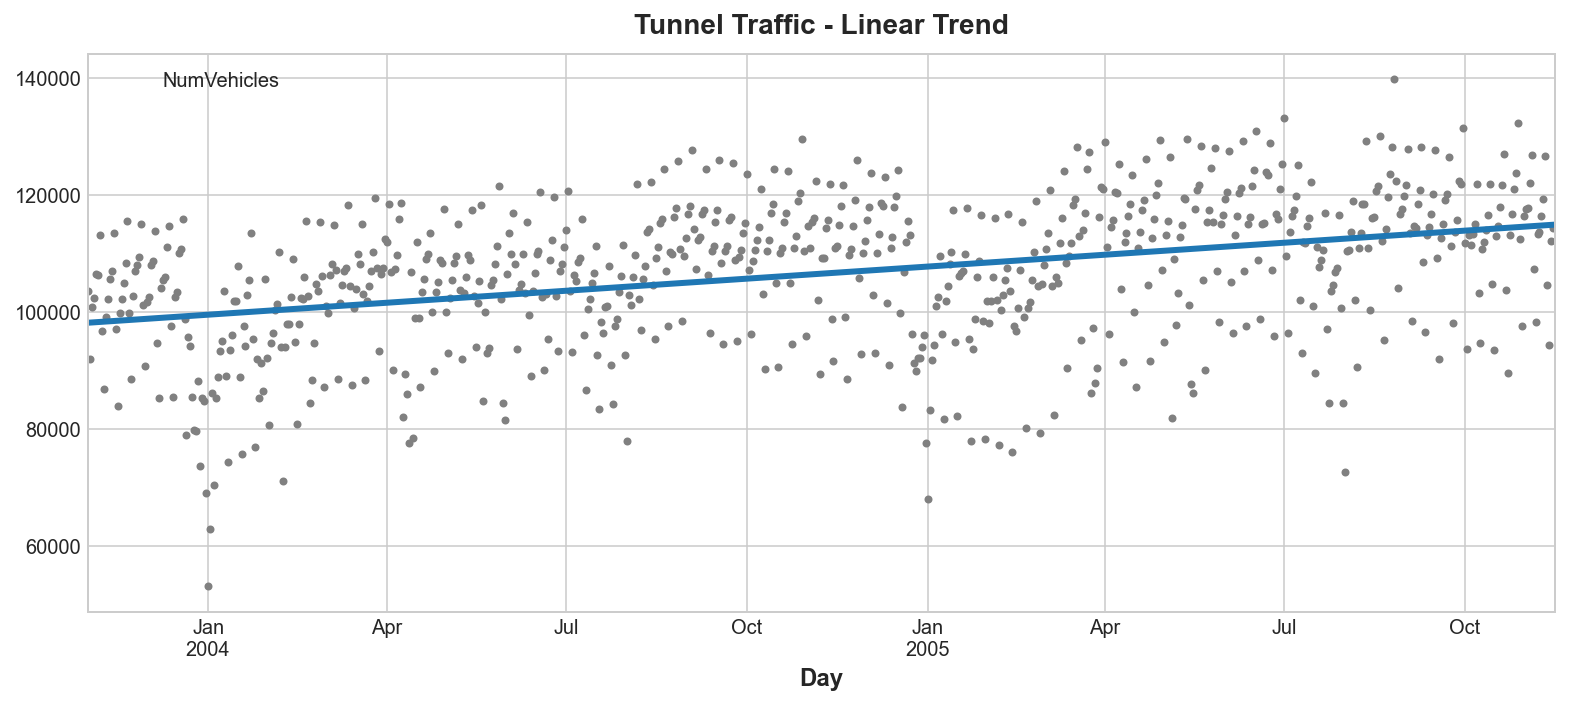

In [15]:
ax = tunnel.plot(style=".", color="0.5", title="Tunnel Traffic - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

Para hacer un pronóstico, aplicamos nuestro modelo a características "fuera de la muestra". "Fuera de muestra" se refiere a tiempos fuera del período de observación de los datos de entrenamiento. Así es como podríamos hacer un pronóstico de 30 días:

In [17]:
X = dp.out_of_sample(steps=30)

y_fore = pd.Series(model.predict(X), index=X.index)

y_fore.head()

2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
Freq: D, dtype: float64

Vamos a graficar la serie para la prediccion en los proximos 30 dias.

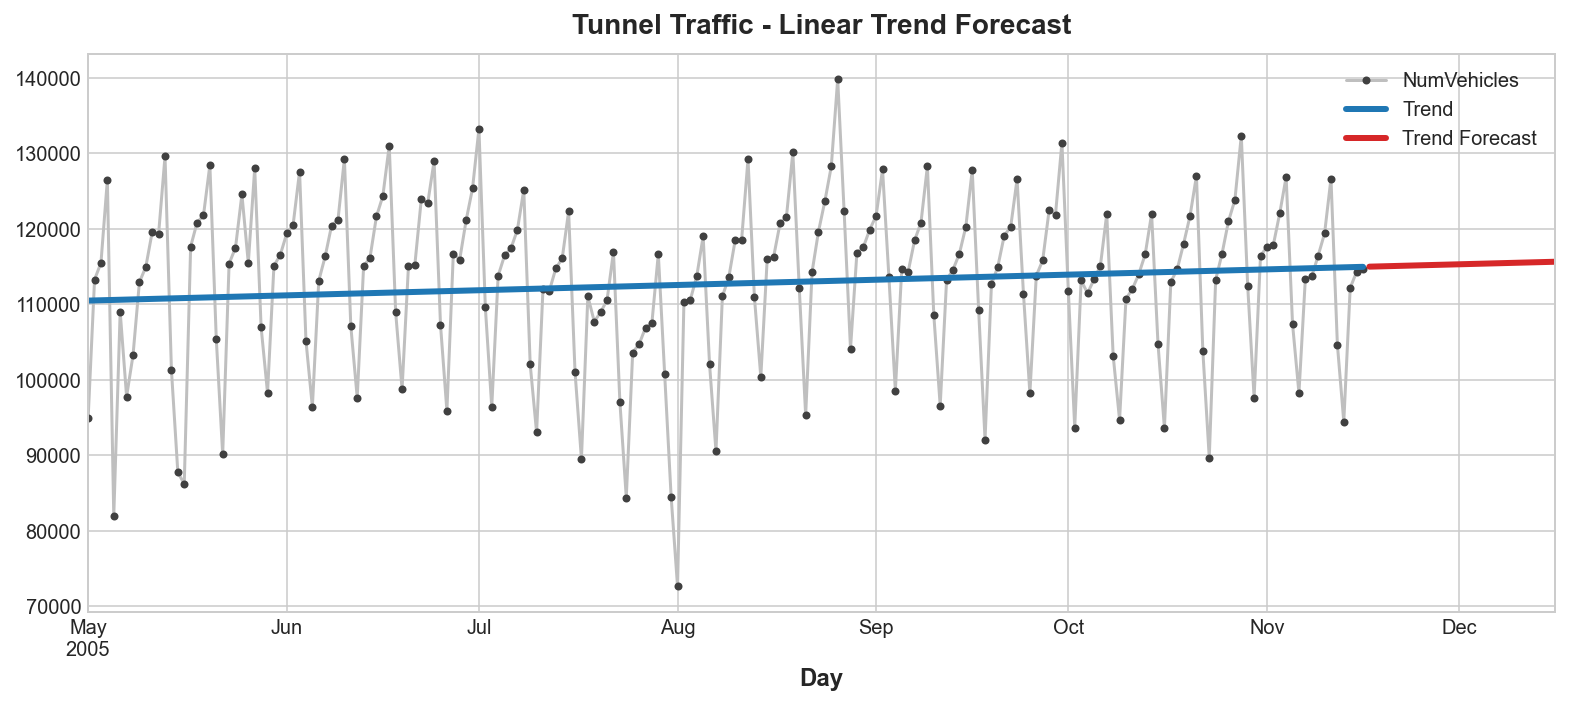

In [18]:
ax = tunnel["2005-05":].plot(title="Tunnel Traffic - Linear Trend Forecast", **plot_params)
ax = y_pred["2005-05":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()

Los modelos de tendencias que aprendimos en esta lección resultan útiles por varias razones. Además de actuar como referencia o punto de partida para modelos más sofisticados, también podemos usarlos como componente en un "modelo híbrido" con algoritmos que no pueden aprender tendencias (como XGBoost y bosques aleatorios). Aprenderemos más sobre esta técnica en la Lección 5.

--------------------------------------------------------------------------------

# (Optional) Fit trend with splines

*Splines* are a nice alternative to polynomials when you want to fit a trend. The *Multivariate Adaptive Regression Splines* (MARS) algorithm in the `pyearth` library is powerful and easy to use. There are a lot of hyperparameters you may want to investigate.

In [23]:
from pyearth import Earth

# Target and features are the same as before
y = tunnel.copy()
dp = DeterministicProcess(index=y.index, order=1)
X = dp.in_sample()

# Fit a MARS model with `Earth`
model = Earth()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

ax = y.plot(**plot_params, title="Average Sales", ylabel="items sold")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend")

ModuleNotFoundError: No module named 'pyearth'

In [22]:
!pip install pyearth

^C


Por lo general, será difícil (si no imposible) pronosticar tendencias complicadas como esta. Sin embargo, con los datos históricos, puede usar splines para aislar otros patrones en una serie de tiempo al *eliminar la tendencia*.

In [ ]:
y_detrended = y - y_pred   # remove the trend from store_sales

y_detrended.plot(**plot_params, title="Detrended Average Sales");